In [345]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy, CategoricalAccuracy


In [346]:
!pip install mnist
import mnist


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [347]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [348]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [349]:
train_images.shape

(60000, 28, 28)

In [350]:
# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [351]:
train_images.shape

(60000, 28, 28, 1)

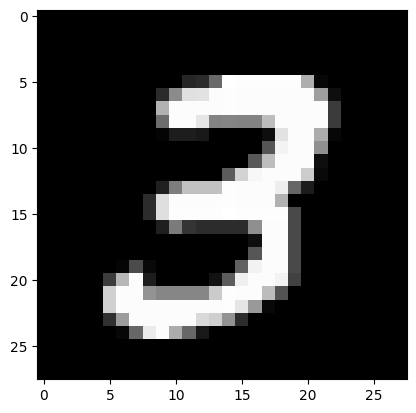

In [352]:
plt.imshow(train_images[7][:, :, 0], cmap='gray')  #,cmap='grayscale' google greyscale in matplot
plt.show()

In [353]:
train_labels[7]

3

In [354]:
learning_rate = 0.008
n_epochs = 35
initializer = RandomNormal(mean=0., stddev=1.)

In [355]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu', kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax', kernel_initializer=initializer))

In [356]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

model.compile(
    optimizer='adam',
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy()],
)

history = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=n_epochs,
    validation_data=(test_images, to_categorical(test_labels)),
    callbacks=[early_stopping]
)

Epoch 1/35
1875/1875 [==============================] - 2s 1ms/step - loss: 4.1431 - categorical_accuracy: 0.4487 - val_loss: 0.5864 - val_categorical_accuracy: 0.8287
Epoch 2/35
1875/1875 [==============================] - 2s 933us/step - loss: 1.0488 - categorical_accuracy: 0.6821 - val_loss: 0.4398 - val_categorical_accuracy: 0.8742
Epoch 3/35
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7274 - categorical_accuracy: 0.7717 - val_loss: 0.3314 - val_categorical_accuracy: 0.9031
Epoch 4/35
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5824 - categorical_accuracy: 0.8200 - val_loss: 0.2772 - val_categorical_accuracy: 0.9166
Epoch 5/35
1875/1875 [==============================] - 2s 907us/step - loss: 0.4892 - categorical_accuracy: 0.8523 - val_loss: 0.2386 - val_categorical_accuracy: 0.9292
Epoch 6/35
1875/1875 [==============================] - 2s 929us/step - loss: 0.4309 - categorical_accuracy: 0.8704 - val_loss: 0.2109 - val_categorical_acc

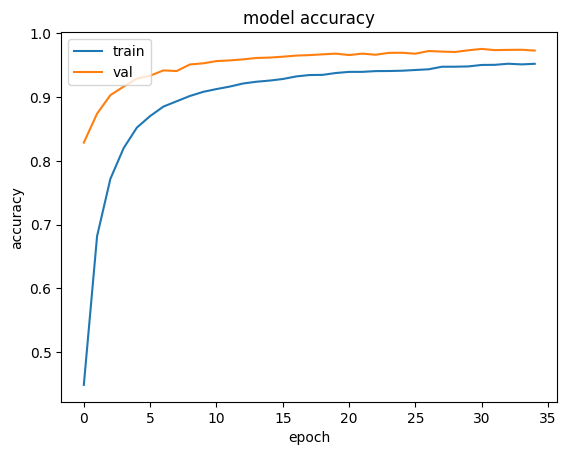

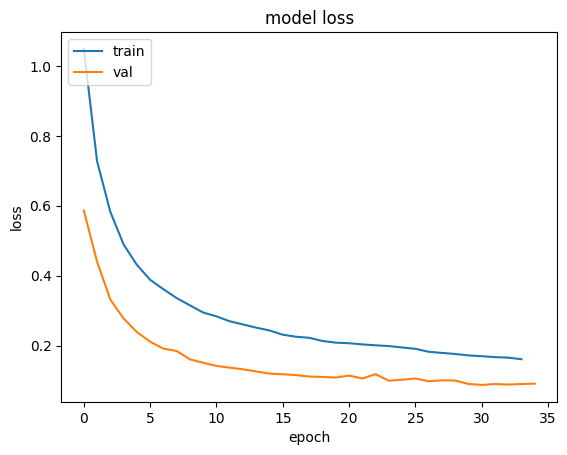

In [357]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [358]:
predictions = model.predict(test_images[:5])

print(predictions.shape)
print(predictions)

# Print our model's predictions.
print("Predictions")
print(np.argmax(predictions, axis=1))  # [7, 2, 1, 0, 4]

print("Data")
# Check our predictions
print(test_labels[:5])  # [7, 2, 1, 0, 4]


1/1 [==============================] - 0s 54ms/step
(5, 10)
[[2.89701802e-06 2.06324949e-05 1.21693243e-04 2.78536550e-04
  8.77330967e-06 3.02806366e-05 1.11019153e-06 9.99370277e-01
  1.19923552e-05 1.53845962e-04]
 [2.22830931e-05 6.30903756e-04 9.98486638e-01 6.00411149e-04
  3.33783373e-06 3.64305306e-05 1.68294267e-04 8.69434461e-06
  4.11168112e-05 1.85379668e-06]
 [1.05529784e-06 9.99758542e-01 2.24129253e-05 1.50251135e-05
  1.15448020e-05 2.88364590e-05 2.23130519e-05 2.13706007e-05
  1.10727997e-04 8.09733683e-06]
 [9.99485135e-01 1.13870556e-06 5.17036242e-05 2.66230454e-05
  2.43806844e-05 1.33321417e-04 1.70555504e-04 3.62787468e-05
  1.86198722e-05 5.21330003e-05]
 [5.91074786e-06 2.59824128e-06 3.22681553e-05 3.34756669e-06
  9.98810530e-01 1.52606663e-05 4.42437340e-05 4.02083024e-05
  9.40701739e-06 1.03628973e-03]]
Predictions
[7 2 1 0 4]
Data
[7 2 1 0 4]


In [359]:
model.save('model.keras')